# Financial Inclusion in Africa Zindi Competition


Remember to read the competition details in the zindi platform, [Zindi Africa](https://zindi.africa)

In [ ]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
# Import data
train_data = pd.read_csv('/content/drive/MyDrive/zindi/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/zindi/Test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# print shape 
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output show the number of rows and columns for train and test dataset 

In [ ]:
# Inspect train Data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset 

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/zindi/SampleSubmission.csv')
submission.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


## Explolatory Data Analysis 

This is the process of finding some insights from you dataset before create predictive models.

**Note:** This is important steps in your Data science workflow.

In [ ]:
#show list of columns 
list(train_data.columns)  

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [ ]:
## show Some information about the dataset 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering techniques you can apply.

In [ ]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.

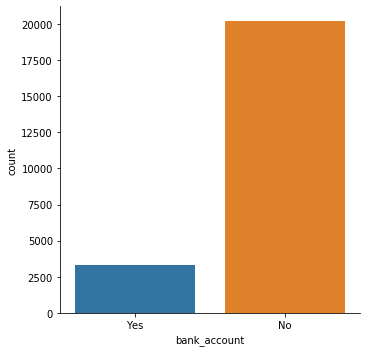

In [ ]:
# Explore Target distribution 

sns.catplot(x="bank_account", kind="count", data=train_data)

In [ ]:
train_data['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

The data shows that we have large number of **no** class than **yes** class  in our target variable 

In my previous article , I explained more about Exploratory data analysis with the financial Inclusion in Africa dataset.You can read and download the notebook [here](https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

## Data Preprocessing 

In [ ]:
test_data = test_data.drop(['year'],axis=1)
# test_data = test_data.drop(['household_size'],axis=1)


In [ ]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])

#Separate training features from target
train_data = train_data.drop(['year'], axis=1)
# train_data = train_data.drop(['household_size'], axis=1)

X_train = train_data.drop(['bank_account'], axis=1)

y_train = train_data['bank_account']

# y_train = pd.DataFrame(train_data['bank_account'])

X_train.head()

,country,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# our target 
y_train.head() 

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

In [ ]:
X_train = X_train.drop(['year'],axis=1)

In [ ]:
X_train = X_train.drop(['household_size'],axis=1)

In [ ]:
X_train = X_train.drop(['household_size'],axis=1)

I have created a simple preprocessing function to handle 

- conversion of data types
- convert categorical features to numerical by one-hot encoding method and label encoding
- drop uniqueid variable 
- scaling our data into range of 0 and 1 

In [ ]:
# function to preprocess our data from train models

def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size","age_of_respondent"]].values.astype(
        float
    )

    # categorical features to be converted by One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country",
    ]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    data = data.drop(["cellphone_access"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [ ]:
# preprocess the train data 
processed_train_data = preprocessing_data(X_train)

In [ ]:
# the first train row 
processed_train_data.shape

(23524, 35)

In [ ]:
# preprocess the test data
processed_test_data = preprocessing_data(test_data)

In [ ]:
# the first test row
processed_test_data.shape

(10086, 35)

In [ ]:
# shape of the processed train set
processed_train_data.shape 

(23524, 37)

In [ ]:
# shape of the processed test set
processed_test_data

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.]])

### Model Building and Experiment 

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [ ]:
#import classifier algorithm here 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 
import lightgbm as lgb
from sklearn.svm import SVC 

# create models 
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
SVC_model = SVC(kernel='linear',random_state = 0)


#fitting the models
lg_model.fit(X_Train,y_Train)
rf_model.fit(X_Train,y_Train)
kn_model.fit(X_Train,y_Train)
et_model.fit(X_Train,y_Train)
xg_model.fit(X_Train,y_Train)
lgb_model.fit(X_Train,y_Train,eval_set=[( X_val,y_val),(X_Train,y_Train)],verbose=20,eval_metric='logloss')
SVC_model.fit(X_Train,y_Train)


[20]	training's binary_logloss: 0.28772	training's binary_logloss: 0.28772	valid_0's binary_logloss: 0.289215	valid_0's binary_logloss: 0.289215
[40]	training's binary_logloss: 0.271869	training's binary_logloss: 0.271869	valid_0's binary_logloss: 0.278648	valid_0's binary_logloss: 0.278648
[60]	training's binary_logloss: 0.26413	training's binary_logloss: 0.26413	valid_0's binary_logloss: 0.277645	valid_0's binary_logloss: 0.277645
[80]	training's binary_logloss: 0.258768	training's binary_logloss: 0.258768	valid_0's binary_logloss: 0.277713	valid_0's binary_logloss: 0.277713
[100]	training's binary_logloss: 0.253505	training's binary_logloss: 0.253505	valid_0's binary_logloss: 0.278346	valid_0's binary_logloss: 0.278346


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
models = {"lg_model" : LogisticRegression(),
"rf_model" : RandomForestClassifier(),
"kn_model" : KNeighborsClassifier(),
"et_model" : ExtraTreesClassifier(),
"xg_model" : XGBClassifier(),
"lgb_model" : lgb.LGBMClassifier(),
"SVC_model" : SVC()


}
def fit_and_score(models , X_Train , X_val , y_Train , y_val):
  model_scores = {}
  for name, model in models.items():
    model.fit(X_Train,y_Train)
    model_scores[name] = model.score(X_val,y_val)

  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_Train=X_Train,
                             X_val=X_val,
                             y_Train=y_Train,
                             y_val=y_val) 

In [ ]:
model_scores

{'SVC_model': 0.8916277093072673,
 'et_model': 0.8538036549086273,
 'kn_model': 0.8810029749256268,
 'lg_model': 0.8861028474288143,
 'lgb_model': 0.8899277518062049,
 'rf_model': 0.8644283892902678,
 'xg_model': 0.8899277518062049}

In [ ]:
# {'SVC_model': 0.8916277093072673,
#  'et_model': 0.8559286017849553,
#  'kn_model': 0.8810029749256268,
#  'lg_model': 0.8861028474288143,
#  'lgb_model': 0.8895027624309392,
#  'rf_model': 0.8661283467913302,
#  'xg_model': 0.8899277518062049}

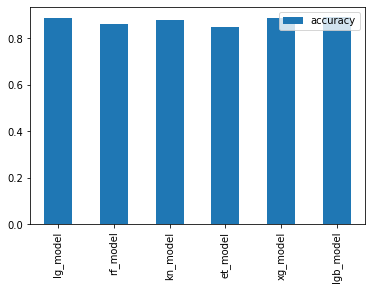

In [ ]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)
lgb_y_pred = lgb_model.predict(X_val)
SVC_y_pred = SVC_model.predict(X_val)

# Get error rate
print("Error rate of Logistic Regression classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_pred))
print("Error rate of lGB classifier: ", 1 - accuracy_score(y_val, lgb_y_pred))
print("Error rate of lGB classifier: ", 1 - accuracy_score(y_val, lgb_y_pred))
print("Error rate of SVC classifier: ", 1 - accuracy_score(y_val, SVC_y_pred))



Error rate of Logistic Regression classifier:  0.11389715257118571
Error rate of Random Forest classifier:  0.1334466638334042
Error rate of KNeighbors Classifier:  0.11899702507437315
Error rate of Extra Tree classifier:  0.1457713557161071
Error rate of XGB classifier:  0.11007224819379513
Error rate of lGB classifier:  0.11049723756906082
Error rate of lGB classifier:  0.11049723756906082
Error rate of SVC classifier:  0.12324691882702932


In [ ]:
# Error rate of Logistic Regression classifier:  0.11219719507012327
# Error rate of Random Forest classifier:  0.13557161070973223
# Error rate of KNeighbors Classifier:  0.11814704632384188
# Error rate of Extra Tree classifier:  0.14109647258818525
# Error rate of XGB classifier:  0.10922226944326396
# Error rate of lGB classifier:  0.10879728006799827

Error rate of XGB classifier:  0.10964725881852955


XGB Classifier performs better than others classifiers.

let's check the confusion matrix for XGB Classifier

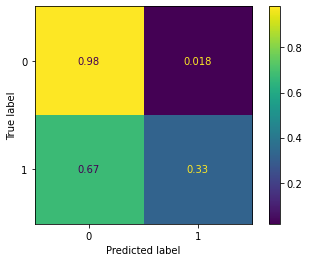

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier 
plot_confusion_matrix(xg_model,X_val, y_val,normalize='true')

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Optimize model paramaters 
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.7min finished


{'gamma': 1, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.6}


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


# fit by setting best parameters and Evaluate model
my_xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

my_xgb_model.fit(X_Train, y_Train)
y_pred = my_xgb_model.predict(X_val)

# Get error rate
print("Error rate of the  XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the  XGB classifier:  0.10922226944326396


In [ ]:
# Error rate of the  XGB classifier:  0.10879728006799827

Our model has been improved 

In [ ]:
# Get the predicted result for the test Data
test_data.bank_account =my_xgb_model.predict(processed_test_data)

In [ ]:
# create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [ ]:
#show the five sample
submission.sample(50)

,uniqueid,bank_account
7817,uniqueid_8092 x Tanzania,0
5942,uniqueid_12077 x Rwanda,0
517,uniqueid_6586 x Kenya,0
8270,uniqueid_8545 x Tanzania,0
9896,uniqueid_2813 x Uganda,0
755,uniqueid_6824 x Kenya,0
7114,uniqueid_7389 x Tanzania,0
9242,uniqueid_2159 x Uganda,0
185,uniqueid_6254 x Kenya,0
9888,uniqueid_2805 x Uganda,0


In [ ]:
# Create submission csv file
submission.to_csv('/content/drive/MyDrive/zindi/submission_16.csv', index = False)

Upload your **first_submission.csv** in the zindi competition

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_Train, y_Train)
lgb_test = lgb.Dataset(X_val, y_val)

In [ ]:
params = {
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':9
}

In [ ]:
gbm = lgb.train(
params,
lgb_train,
num_boost_round=500,
valid_sets=[lgb_train, lgb_test],
early_stopping_rounds=10
)


[1]	training's multi_logloss: 0.380015	valid_1's multi_logloss: 0.379298
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 0.362967	valid_1's multi_logloss: 0.361916
[3]	training's multi_logloss: 0.349421	valid_1's multi_logloss: 0.348784
[4]	training's multi_logloss: 0.339176	valid_1's multi_logloss: 0.338789
[5]	training's multi_logloss: 0.330559	valid_1's multi_logloss: 0.330336
[6]	training's multi_logloss: 0.322877	valid_1's multi_logloss: 0.323129
[7]	training's multi_logloss: 0.316355	valid_1's multi_logloss: 0.31678
[8]	training's multi_logloss: 0.31091	valid_1's multi_logloss: 0.311819
[9]	training's multi_logloss: 0.306225	valid_1's multi_logloss: 0.307294
[10]	training's multi_logloss: 0.302182	valid_1's multi_logloss: 0.303415
[11]	training's multi_logloss: 0.298517	valid_1's multi_logloss: 0.299951
[12]	training's multi_logloss: 0.295482	valid_1's multi_logloss: 0.297145
[13]	training's multi_logloss: 0.292728	valid_1's multi_loglo

In [ ]:

test_data.bank_account = lgm.predict(processed_test_data)


NameError: ignored

In [ ]:
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

ValueError: ignored